Giulio Latora

introduction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Gillespie

In [ ]:
b = 0.1
d1 = 0.1
d2 = 0
p1 = 0.25
p2 = 0.05
N = 3200
n0 = 1000
m0 = 800
t = 0

In [ ]:
def Tdeathpred(b, d1, d2, p1, p2, N, n, m):
    result = b * n
    return result


In [ ]:
def Tbirthprey(b, d1, d2, p1, p2, N, n, m):
    result = 2 * b * m/N * (N - n - m)
    return result

In [ ]:
def Tdeathprey(b, d1, d2, p1, p2, N, n, m):
    result = ( 2 * p2 * (n * m)/N ) + (d2 * m)
    return result

In [ ]:
def Tint(b, d1, d2, p1, p2, N, n, m):
    result = 2 * p1 * (n * m)/N
    return result

In [ ]:
a0 = np.array([Tdeathpred(b, d1, d2, p1, p2, N, n0, m0), Tbirthprey(b, d1, d2, p1, p2, N, n0, m0), Tdeathprey(b, d1, d2, p1, p2, N, n0, m0), Tint(b, d1, d2, p1, p2, N, n0, m0)])
a_tot_0 = np.sum([Tdeathpred(b, d1, d2, p1, p2, N, n0, m0), Tbirthprey(b, d1, d2, p1, p2, N, n0, m0), Tdeathprey(b, d1, d2, p1, p2, N, n0, m0), Tint(b, d1, d2, p1, p2, N, n0, m0)])

In [ ]:
def ExponentialDis(lam):
    rng01 =  np.random.uniform()
    inverse = - (np.log(rng01) /lam)
    return inverse


In [ ]:
lenghtofprocess = 120000

In [ ]:
def gillespie(b, d1, d2, p1, p2, N, n0, m0):
    transitiontimes = np.array([t])
    numberpred = np.array([n0])
    numberprey = np.array([m0])
    n = n0
    m = m0
    for i in range(1, lenghtofprocess):
        a1 = Tdeathpred(b, d1, d2, p1, p2, N, n, m)
        a2 = Tbirthprey(b, d1, d2, p1, p2, N, n, m)
        a3 = Tdeathprey(b, d1, d2, p1, p2, N, n, m)
        a4 = Tint(b, d1, d2, p1, p2, N, n, m)
        a_tot = a1 + a2 + a3 + a4
        #a = np.array([Tdeathpred(b, d1, d2, p1, p2, N, n, m), Tbirthprey(b, d1, d2, p1, p2, N, n, m), Tdeathprey(b, d1, d2, p1, p2, N, n, m), Tint(b, d1, d2, p1, p2, N, n, m)])
        #a_tot = np.sum([Tdeathpred(b, d1, d2, p1, p2, N, n, m), Tbirthprey(b, d1, d2, p1, p2, N, n, m), Tdeathprey(b, d1, d2, p1, p2, N, n, m), Tint(b, d1, d2, p1, p2, N, n, m)])

        transitiontimes = np.append(transitiontimes, ExponentialDis(a_tot) + transitiontimes[-1])

        rnguniform = np.random.uniform(0, a_tot)
        if  0<= rnguniform < a1:
            n = n-1
            numberpred = np.append(numberpred, n)
            numberprey = np.append(numberprey, m)
        elif a1 <= rnguniform < a1 + a2:
            m = m + 1
            numberpred = np.append(numberpred, n)
            numberprey = np.append(numberprey, m)
        elif a1 + a2 <= rnguniform < a1 + a2 + a3:
            m = m-1
            numberpred = np.append(numberpred, n)
            numberprey = np.append(numberprey, m)
        elif a1 + a2 + a3 <= rnguniform <= a_tot:
            n = n+1
            m = m -1
            numberpred = np.append(numberpred, n)
            numberprey = np.append(numberprey, m)

    return transitiontimes, numberpred, numberprey

In [ ]:
transitiontimes,  numberpred, numberprey = gillespie( b, d1, d2, p1, p2, N, n0, m0)

Plot below definition

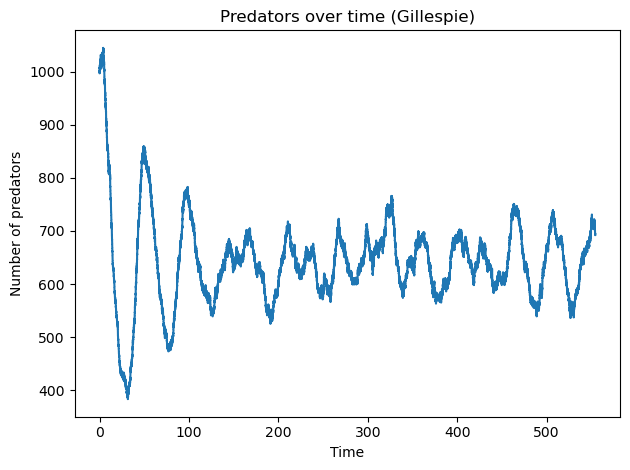

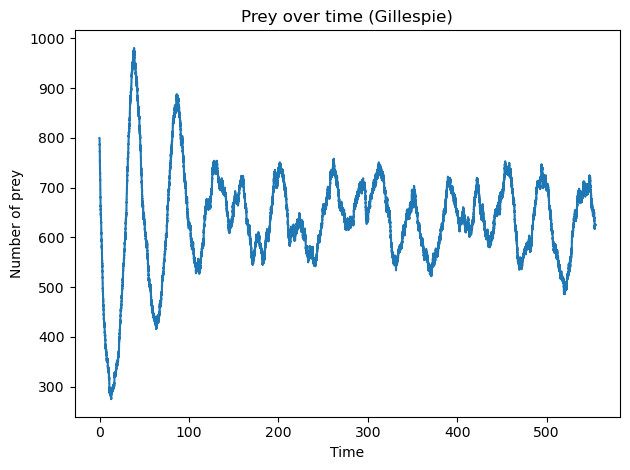

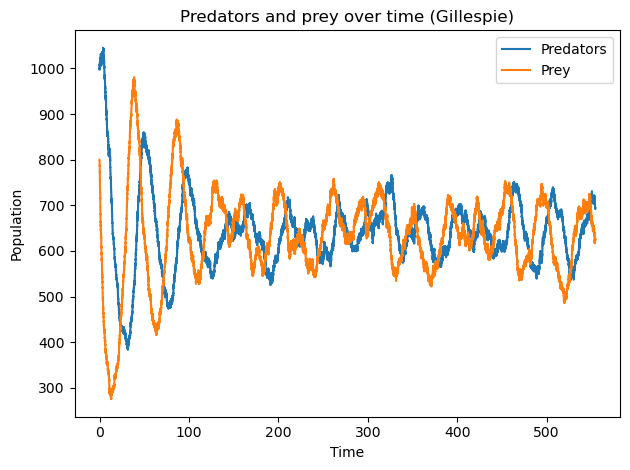

In [ ]:
plt.figure()
plt.step(transitiontimes, numberpred, where="post")
plt.xlabel("Time")
plt.ylabel("Number of predators")
plt.title("Predators over time (Gillespie)")
plt.tight_layout()
plt.show()

plt.figure()
plt.step(transitiontimes, numberprey, where="post")
plt.xlabel("Time")
plt.ylabel("Number of prey")
plt.title("Prey over time (Gillespie)")
plt.tight_layout()
plt.show()

plt.figure()
plt.step(transitiontimes, numberpred, where="post", label="Predators")
plt.step(transitiontimes, numberprey, where="post", label="Prey")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predators and prey over time (Gillespie)")
plt.legend()
plt.tight_layout()
plt.show()

Define Plot Below

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_trajectory_on_grid(t_trans, pred, prey, t_grid, *, assume_start_at_t0=True):
    """
    Convert a Gillespie step trajectory (piecewise-constant) to values on a common time grid.
    t_trans: (K,) transition times (monotone increasing)
    pred, prey: (K,) populations at those times
    t_grid: (T,) time points to sample at
    Returns: pred_grid, prey_grid (both shape (T,))
    """
    t_trans = np.asarray(t_trans, dtype=float)
    pred = np.asarray(pred, dtype=float)
    prey = np.asarray(prey, dtype=float)
    t_grid = np.asarray(t_grid, dtype=float)

    if t_trans.ndim != 1 or pred.ndim != 1 or prey.ndim != 1:
        raise ValueError("t_trans, pred, prey must be 1D arrays")
    if not (len(t_trans) == len(pred) == len(prey)):
        raise ValueError("t_trans, pred, prey must have same length")
    if len(t_trans) == 0:
        raise ValueError("Empty trajectory")

    # If the first transition time is > 0 but pred/prey represent state at that first time,
    # we assume state holds from t=0 to t_trans[0]. This is common with Gillespie outputs.
    # If your output includes t=0 already, this still works.
    if assume_start_at_t0 and t_trans[0] > 0:
        t_trans = np.concatenate(([0.0], t_trans))
        pred = np.concatenate(([pred[0]], pred))
        prey = np.concatenate(([prey[0]], prey))

    # For each t in grid, find the last transition time <= t
    # idx in [0..K-1]
    idx = np.searchsorted(t_trans, t_grid, side="right") - 1
    idx = np.clip(idx, 0, len(t_trans) - 1)

    return pred[idx], prey[idx]


def average_gillespie_trajectories(
    gillespie_fn,
    params,
    n_runs=200,
    dt=0.1,
    t_max=None,
    seed=None,
):
    """
    Run gillespie_fn many times, resample onto a common time grid, and compute mean trajectory.

    gillespie_fn: function(*params) -> (transitiontimes, numberpred, numberprey)
    params: tuple of args to pass to gillespie_fn, e.g. (b, d1, d2, p1, p2, N, n0, m0)
    n_runs: number of stochastic realizations
    dt: time-bin width (smaller = smoother but more compute)
    t_max: if None, use the max final time across runs
    seed: optional RNG seed (used only for your wrapper logic; your gillespie may have its own RNG)
    """
    rng = np.random.default_rng(seed)

    trajectories = []
    t_ends = []

    for i in range(n_runs):
        # If your gillespie uses numpy.random globally, you can set a per-run seed like this:
        # np.random.seed(rng.integers(0, 2**32 - 1, dtype=np.uint32).item())
        t_trans, pred, prey = gillespie_fn(*params)

        pred = pred/N
        prey = prey/N

        t_trans = np.asarray(t_trans, dtype=float)
        pred = np.asarray(pred, dtype=float)
        prey = np.asarray(prey, dtype=float)

        trajectories.append((t_trans, pred, prey))
        t_ends.append(t_trans[-1])

    if t_max is None:
        t_max = float(np.max(t_ends))

    # Common time grid (bin centers). You can also use edges; centers are fine for plotting.
    t_grid = np.arange(0.0, t_max + dt, dt)

    pred_samples = np.empty((n_runs, len(t_grid)), dtype=float)
    prey_samples = np.empty((n_runs, len(t_grid)), dtype=float)

    for i, (t_trans, pred, prey) in enumerate(trajectories):
        pred_i, prey_i = sample_trajectory_on_grid(t_trans, pred, prey, t_grid)
        pred_samples[i] = pred_i
        prey_samples[i] = prey_i

    pred_mean = pred_samples.mean(axis=0)
    prey_mean = prey_samples.mean(axis=0)

    pred_std = pred_samples.std(axis=0, ddof=1) if n_runs > 1 else np.zeros_like(pred_mean)
    prey_std = prey_samples.std(axis=0, ddof=1) if n_runs > 1 else np.zeros_like(prey_mean)

    return t_grid, pred_mean, prey_mean, pred_std, prey_std


def plot_average(t_grid, pred_mean, prey_mean, pred_std=None, prey_std=None, show_band=True):
    plt.figure()
    #plt.plot(t_grid, prey_mean, label="Prey mean")
    plt.plot(t_grid, pred_mean, label="Predator mean")

    time, pred, _ = gillespie( b, d1, d2, p1, p2, N, n0, m0)

    pred = pred/N
    plt.plot(time, pred, label="Single PRed Traj")
    '''
    if show_band and pred_std is not None and prey_std is not None:
        plt.fill_between(t_grid, prey_mean - prey_std, prey_mean + prey_std, alpha=0.2, label="Prey ±1σ")
        plt.fill_between(t_grid, pred_mean - pred_std, pred_mean + pred_std, alpha=0.2, label="Pred ±1σ")
    '''

    plt.ylim(0.16, 0.24)

    plt.xlabel("time")
    plt.ylabel("population")
    plt.legend()
    plt.tight_layout()
    plt.show()


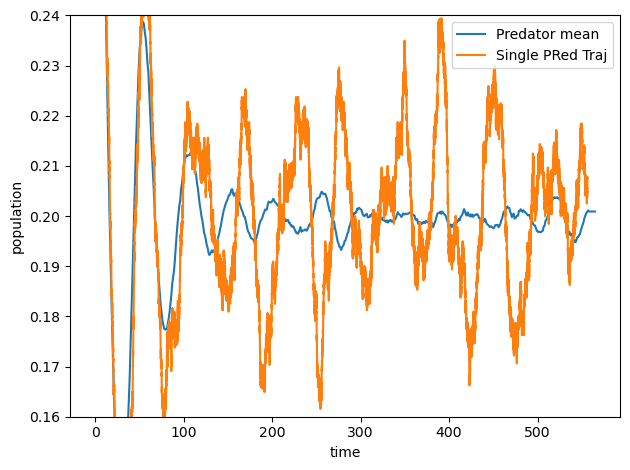

In [ ]:
params = (b, d1, d2, p1, p2, N, n0, m0)

t_grid, pred_mean, prey_mean, pred_std, prey_std = average_gillespie_trajectories(
    gillespie_fn=gillespie,
    params=params,
    n_runs= 100,   # increase for smoother averages
    dt=1       # decrease for finer time averaging
)

plot_average(t_grid, pred_mean, prey_mean, pred_std, prey_std)

Differential equations introduction

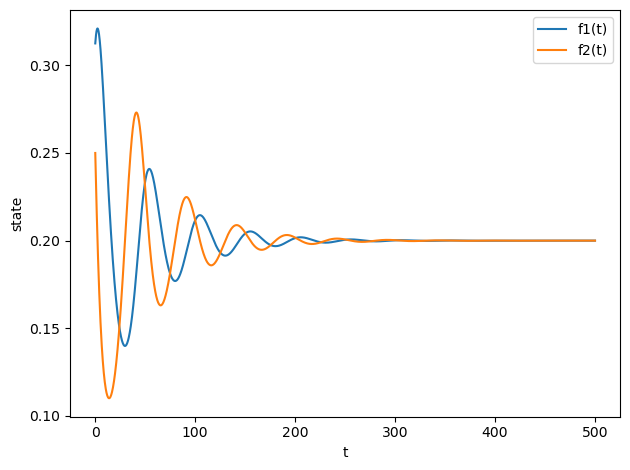

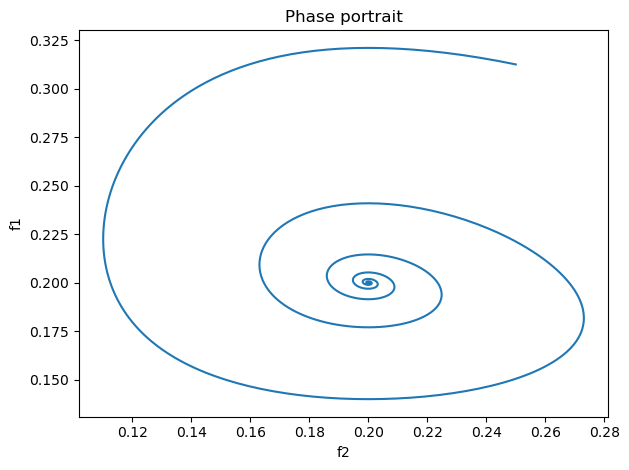

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def rhs(t, y, p1, p2, b, mu, r, K):
    f1, f2 = y

    n = 2.0 * p1 * f2
    g = 2.0 * (p1 + p2 + b) * f2

    df1 = (n - mu) * f1
    df2 = r * f2 * (1.0 - f2 / K) - g * f1

    return [df1, df2]

# ---- parameters (EDIT THESE) ----
p1  = 0.25
p2  = 0.05
b   = 0.1
d1 = 0.1
d2 = 0.0
mu = d1
r   = 2.0 * b - d2
K   = 1.0 - d2/(2.0 * b)

# ---- initial conditions ----
f1_0 = 1000/3200
f2_0 = 0.25
y0 = [f1_0, f2_0]

# ---- time span ----
t0, tf = 0.0, 500
t_eval = np.linspace(t0, tf, 2000)

# ---- integrate with Runge–Kutta (RK45) ----
sol = solve_ivp(
    rhs,
    (t0, tf),
    y0,
    method="RK45",          # Runge–Kutta
    t_eval=t_eval,
    args=(p1, p2, b, mu, r, K),
    rtol=1e-8,
    atol=1e-10
)

if not sol.success:
    raise RuntimeError(sol.message)

f1 = sol.y[0]
f2 = sol.y[1]

# ---- plot vs time ----
plt.figure()
plt.plot(sol.t, f1, label="f1(t)")
plt.plot(sol.t, f2, label="f2(t)")
plt.xlabel("t")
plt.ylabel("state")
plt.legend()
plt.tight_layout()
plt.show()

# ---- phase plot (optional) ----
plt.figure()
plt.plot(f2, f1)
plt.xlabel("f2")
plt.ylabel("f1")
plt.title("Phase portrait")
plt.tight_layout()
plt.show()


Calculation of fixed point

Conclusions (overlapping average ILM and PLM)

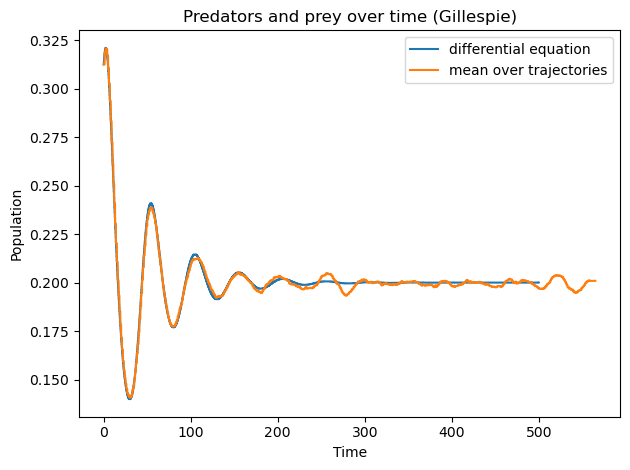

In [ ]:
plt.figure()
plt.step(sol.t, f1, where="post", label="differential equation")
plt.step(t_grid, pred_mean, where="post", label="mean over trajectories")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predators and prey over time (Gillespie)")
plt.legend()
plt.tight_layout()
plt.show()